In [1]:
from loadTDMS import *
from fft_test import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

In [5]:
tool = "A"
location = "work"
fq = 1

In [6]:
aem = np.load(rf"Z:\200 Produced_data\master_paper_data\{tool}\AE\AE_{location}_1-120_s{fq}.npy")
cfm = np.load(rf"Z:\200 Produced_data\master_paper_data\{tool}\CF\CF_1-120.npy")

In [15]:
len(aem)

144000

In [8]:
len(cfm)

144000

In [19]:
len(aem)/12

12000.0

In [21]:
aem_s = aem.reshape(int(len(aem)/12),12)
cfm_s = cfm.reshape(int(len(cfm)/12),12)
aem_s.shape

(12000, 12)

In [27]:
corr_matrix = np.corrcoef(aem_s[0],cfm_s[0])

In [33]:
corr_matrix[0][1]

0.9506025309675059

In [166]:
%matplotlib inline
def get_corr_matrix(tool,location):
    corr_matrix = []
    xtics = [rf"{(i-1)*10 + 1}-{i*10}"for i in range(1,13)]
    ytics = [rf"{(i-1)*50}-{i*50}" for i in range(10,0,-1)]
    cfm = np.load(rf"Z:\200 Produced_data\master_paper_data\{tool}\CF\CF_1-120.npy")
#     cfm_s = cfm.reshape(int(len(cfm)/12),12)
    for fq in range(10,0,-1):
#         print(fq)
        aem = np.load(rf"Z:\200 Produced_data\master_paper_data\{tool}\AE\AE_{location}_1-120_s{fq}.npy")
#         aem_s = aem.reshape(int(len(aem)/12),12)
        for j in range(0,12):
            ae = aem[int(len(aem)/12*j) : int(len(aem)/12*(j+1))]
            cf = cfm[int(len(cfm)/12*j) : int(len(cfm)/12*(j+1))]
            temp = np.corrcoef(ae,cf)
#             temp = np.corrcoef(aem_s[j], cfm_s[j])
#             print(temp[0][1])
            corr_matrix.append(temp[0][1])
#         print("-------------------------")
    corr_matrix = np.array(corr_matrix)
    corr_matrix = corr_matrix.reshape(10,12)
    np.save(rf"Z:\200 Produced_data\master_paper_data\correlation\{location}_{tool}_1-120", corr_matrix)
    
    figure, ax = plt.subplots()
    sns.heatmap(corr_matrix , annot=True, fmt='.1f', xticklabels=xtics, yticklabels=ytics)
    figure.savefig(rf"Z:\200 Produced_data\master_paper_data\correlation\{location}_{tool}_1-120.png", dpi=500)

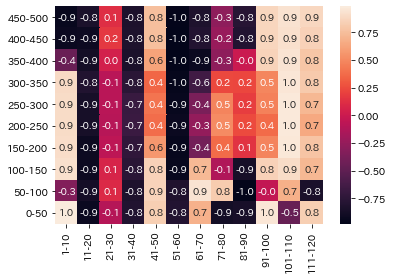

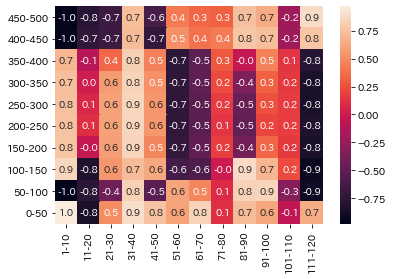

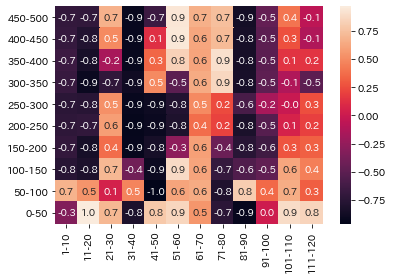

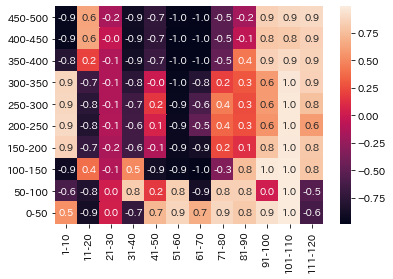

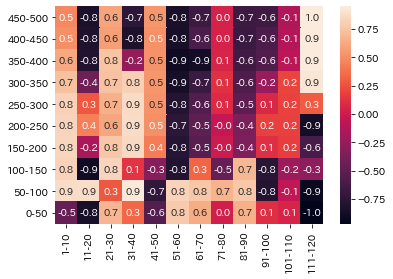

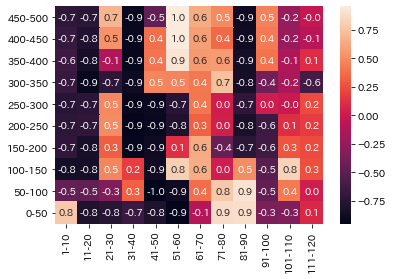

In [167]:
get_corr_matrix("A", "spindle")
get_corr_matrix("B", "spindle")
get_corr_matrix("C", "spindle")

get_corr_matrix("A", "work")
get_corr_matrix("B", "work")
get_corr_matrix("C", "work")

10
-0.9657192518668735
-0.7691382017593463
-0.6604324122198078
0.7371257457876681
-0.6160989015723944
0.4255219860478259
0.3395173581203916
0.3198229808074938
0.7481231653803085
0.6552525606832186
-0.20689145532856798
0.8942238742108937
-------------------------
9
-0.9645670934794512
-0.7399642479414784
-0.6705846122812945
0.727513664106205
-0.7149646230484296
0.5197382172850777
0.38646901285455776
0.4348814098736931
0.7766784615537232
0.7377256762351492
-0.21312343135845652
0.7783625923864904
-------------------------
8
0.698939906869855
-0.09374165178616672
0.3519765215951705
0.8188458925269967
0.45797830069090745
-0.7495531380277313
-0.50370665535186
0.28621430148980376
-0.03450458639385435
0.4592404250574592
0.14619213068480205
-0.7797666593507184
-------------------------
7
0.7471520651373986
0.01736678983495477
0.575577662357054
0.8452204025210914
0.5286887084375606
-0.7435376736380914
-0.4989331629675218
0.23859934591640503
-0.35871866443395106
0.32839667021671
0.166673678394234

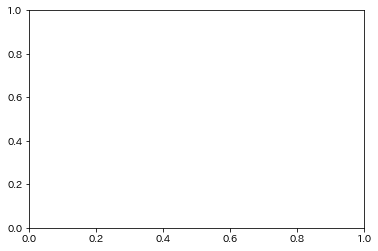

In [153]:
get_corr_matrix("B", "spindle")

In [173]:
a_s = np.load(rf"Z:\200 Produced_data\master_paper_data\correlation\spindle_A_1-120.npy")
b_s = np.load(rf"Z:\200 Produced_data\master_paper_data\correlation\spindle_B_1-120.npy")
c_s = np.load(rf"Z:\200 Produced_data\master_paper_data\correlation\spindle_C_1-120.npy")

a_w = np.load(rf"Z:\200 Produced_data\master_paper_data\correlation\work_A_1-120.npy")
b_w = np.load(rf"Z:\200 Produced_data\master_paper_data\correlation\work_B_1-120.npy")
c_w = np.load(rf"Z:\200 Produced_data\master_paper_data\correlation\work_C_1-120.npy")

In [174]:
s_diff = abs(a_s - b_s) + abs(a_s - c_s) + abs(c_s - b_s)
w_diff = abs(a_w - b_w) + abs(a_w - c_w) + abs(c_w - b_w)

In [175]:
np.save(rf"Z:\200 Produced_data\master_paper_data\correlation\diff_spindle_1-120", s_diff)
np.save(rf"Z:\200 Produced_data\master_paper_data\correlation\diff_work_1-120",w_diff)

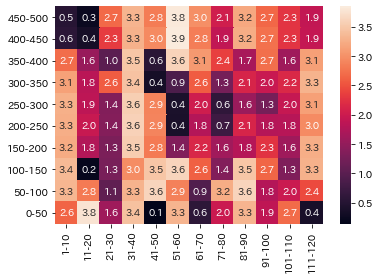

In [177]:
figure, ax = plt.subplots()
xtics = [rf"{(i-1)*10 + 1}-{i*10}"for i in range(1,13)]
ytics = [rf"{(i-1)*50}-{i*50}" for i in range(10,0,-1)]
sns.heatmap(s_diff , annot=True, fmt='.1f', xticklabels=xtics, yticklabels=ytics)
figure.savefig(rf"Z:\200 Produced_data\master_paper_data\correlation\diff_spindle_1-120.png", dpi=500)

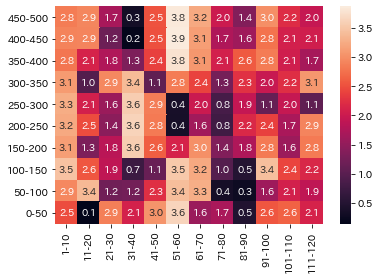

In [178]:
figure, ax = plt.subplots()
xtics = [rf"{(i-1)*10 + 1}-{i*10}"for i in range(1,13)]
ytics = [rf"{(i-1)*50}-{i*50}" for i in range(10,0,-1)]
sns.heatmap(w_diff , annot=True, fmt='.1f', xticklabels=xtics, yticklabels=ytics)
figure.savefig(rf"Z:\200 Produced_data\master_paper_data\correlation\diff_work_1-120.png", dpi=500)

In [17]:
%matplotlib inline
def get_corr_matrix(tool,location):
    corr_matrix = []
#     xtics = [rf"{(i-1)*10 + 1}-{i*10}"for i in range(1,47)]
#     ytics = [rf"{(i-1)*50}-{i*50}" for i in range(10,0,-1)]
    cfm = np.load(rf"Z:\200 Produced_data\master_paper_data\{tool}\CF\CF_1-460.npy")
#     cfm_s = cfm.reshape(int(len(cfm)/12),12)
    for fq in range(10,0,-1):
#         print(fq)
        aem = np.load(rf"Z:\200 Produced_data\master_paper_data\{tool}\AE\AE_{location}_1-460_s{fq}.npy")
#         aem_s = aem.reshape(int(len(aem)/12),12)
        for j in range(0,46):
            ae = aem[int(len(aem)/46*j) : int(len(aem)/46*(j+1))]
            cf = cfm[int(len(cfm)/46*j) : int(len(cfm)/46*(j+1))]
            temp = np.corrcoef(ae,cf)
#             temp = np.corrcoef(aem_s[j], cfm_s[j])
#             print(temp[0][1])
            corr_matrix.append(temp[0][1])
#         print("-------------------------")
    corr_matrix = np.array(corr_matrix)
    corr_matrix = corr_matrix.reshape(10,46)
    np.save(rf"Z:\200 Produced_data\master_paper_data\correlation\{location}_{tool}_1-460", corr_matrix)
    
    figure, ax = plt.subplots()
#     sns.heatmap(corr_matrix , annot=True, fmt='.1f', xticklabels=xtics, yticklabels=ytics)
    sns.heatmap(corr_matrix)

    figure.savefig(rf"Z:\200 Produced_data\master_paper_data\correlation\{location}_{tool}_1-460.png", dpi=500)

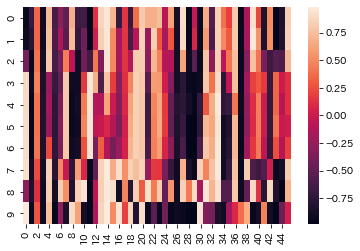

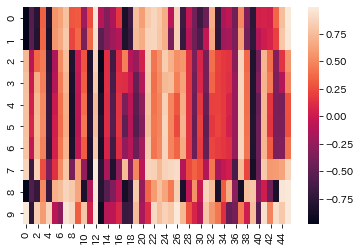

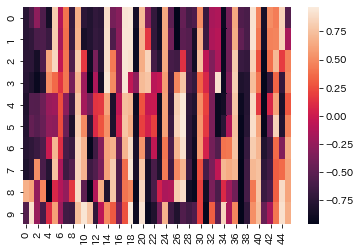

In [18]:
get_corr_matrix("A", "spindle")
get_corr_matrix("B", "spindle")
get_corr_matrix("C", "spindle")